# NBA Predictions Data Preprocessing

Performing **Exploratory Data Analysis(EDA)** on NBA Teamwise Statistics, obtained from data_scraping.py.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

Let us load in the data as a Pandas DataFrame, and see what type of data is present in the dataset:

In [2]:
PATH = os.getcwd()
df = pd.read_csv(PATH + '\\datasets\\2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1278 non-null   object 
 1   Team1AWAY       1278 non-null   object 
 2   Team1Pts        1278 non-null   int64  
 3   Team2HOME       1278 non-null   object 
 4   Team2Pts        1278 non-null   int64  
 5   Team1RANK       1278 non-null   int64  
 6   Team1GP         1278 non-null   int64  
 7   Team1W          1278 non-null   int64  
 8   Team1L          1278 non-null   int64  
 9   Team1MIN        1278 non-null   float64
 10  Team1OFFRTG     1278 non-null   float64
 11  Team1DEFRTG     1278 non-null   float64
 12  Team1NETRTG     1278 non-null   float64
 13  Team1AST%       1278 non-null   float64
 14  Team1AST/TO     1278 non-null   float64
 15  Team1AST_RATIO  1278 non-null   float64
 16  Team1OREB%      1278 non-null   float64
 17  Team1DREB%      1278 non-null   f

*Note that the description of the column names is given in the README file.*

Let us now create the target variable, which will be True(or 1) if the home team wins, and False(or 0) if the away team wins.

In [3]:
df['HomeWin'] = df.apply(lambda x : 1 if x['Team2Pts'] > x['Team1Pts'] else 0, axis=1)

Now that we have our target variable, we can observe the correlation of the different variables, using a correlation heatmap provided by the seaborn library.

<AxesSubplot:>

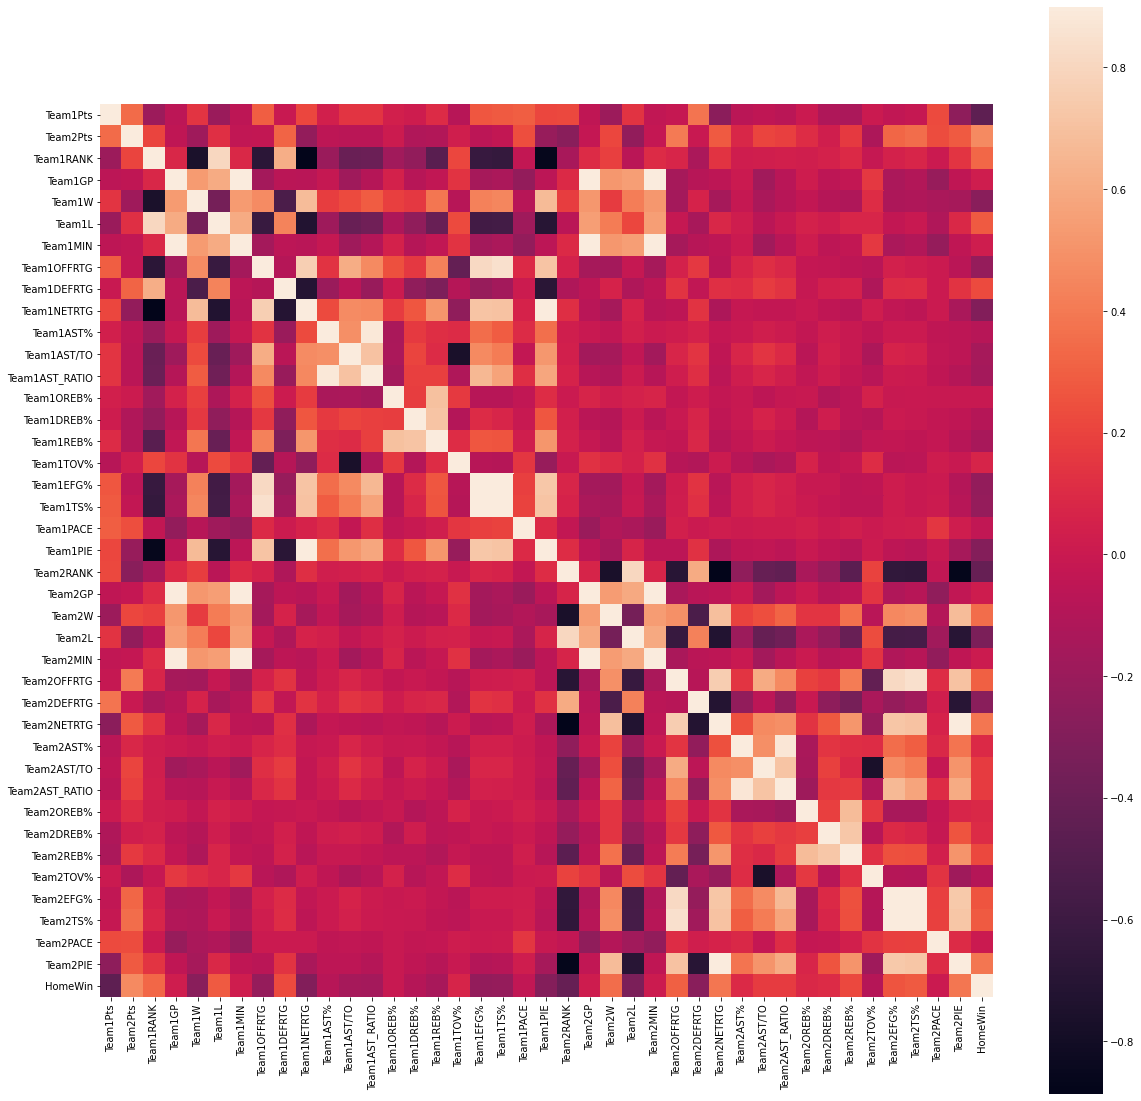

In [4]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, square=True, vmax=0.9)

We can observe a few things from the correlation heatmap:
* RANK has a high negative correlation with W, OFFRTG, NETRTG and PIE.
  * This is because a higher number of wins, higher rating and higher player impact estimate will relate to a lower rank.
* GP has a high positive correlation with MIN.
  * This is because the number of games played is directly proportional to the total number of minutes played
* AST% has a high positive correlation with AST_RATIO.
  * This is because both these stats take the ratio of Assists with similar terms in the denominator.
* AST/TO has a high negative correlation with TOV%.
  * This is because Assist Turnover Ratio takes the ratio of Assists to Turnovers. This means that AST/TO and TOV% are inversely proportional.
* EFG% has a high positive correlation with TS%.
  * This is because both the statistics measure the percent of field goals taken/attempted.
* PIE has a high positive correlation with NETRTG.
  * This is because both Player Impact Estimate and Net Rating are an aggregate of similar statistics
  
We can now see the first 10 features with highest correlation with the target variable.

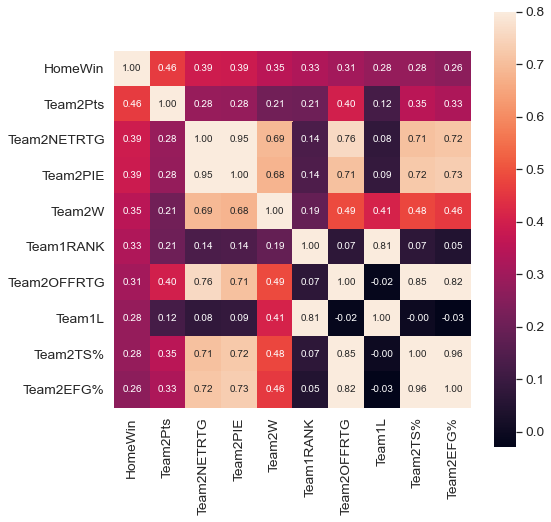

In [5]:
k = 10
cols = corrmat.nlargest(k, 'HomeWin')['HomeWin'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, vmax=0.8, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

After analysing the two correlation heatmaps, we can come to the following conclusion:
The following columns can be deleted since they contain redundant data:
 * RANK
 * GP
 * AST%
 * TOV%
 * EFG%
 * NETRTG
 
Also, the team names and dates were used only for the merging of the two datasets(i.e. results and stats) in data_scraping.py, therefore we can drop these columns too.

Finally, the team scores will not be known before the match is played, which will lead to data leakage. Therefore, we should drop these columns as well.

In [6]:
df_drop = df.drop(['Team1Pts','Team2Pts',
'Team1RANK','Team2RANK',
'Team1GP','Team2GP',
'Team1AST%','Team2AST%',
'Team1TOV%','Team2TOV%',
'Team1EFG%','Team2EFG%',
'Team1NETRTG','Team2NETRTG',
'Team1AWAY','Team2HOME','Date'
], axis=1)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Team1W          1278 non-null   int64  
 1   Team1L          1278 non-null   int64  
 2   Team1MIN        1278 non-null   float64
 3   Team1OFFRTG     1278 non-null   float64
 4   Team1DEFRTG     1278 non-null   float64
 5   Team1AST/TO     1278 non-null   float64
 6   Team1AST_RATIO  1278 non-null   float64
 7   Team1OREB%      1278 non-null   float64
 8   Team1DREB%      1278 non-null   float64
 9   Team1REB%       1278 non-null   float64
 10  Team1TS%        1278 non-null   float64
 11  Team1PACE       1278 non-null   float64
 12  Team1PIE        1278 non-null   float64
 13  Team2W          1278 non-null   int64  
 14  Team2L          1278 non-null   int64  
 15  Team2MIN        1278 non-null   float64
 16  Team2OFFRTG     1278 non-null   float64
 17  Team2DEFRTG     1278 non-null   f

We can now export this data in the form of a .csv file.

In [7]:
df_drop.to_csv(PATH + '\\datasets\\2019_preprocessed.csv', index=False)